<a href="https://colab.research.google.com/github/TackoMori/Project-Showcase/blob/main/copy_of_rocket_league_goals_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question: Rocket League Championship Series 2022-2023 goals per match prediction.




# **Importing, cleaning, and Preprocessing**

In [ ]:
# import packages
import pandas as pd # data processing
import numpy as np # working with arreys

from sklearn.model_selection import train_test_split # data Split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Use pandas to read csv file
matchdata = pd.read_csv("/content/matches_by_teams.csv")
matchdata

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
0,6159ad3d143c37878b2384a9,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,...,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True
1,6159ad3d143c37878b2384a9,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,...,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,False
2,6159ad3d143c37878b2384aa,blue,6020bc70f1e4807cc70023fb,https://octane.gg/teams/23fb-renegades,RENEGADES,Oceania,46.0,21.0,10.0,21.0,...,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True
3,6159ad3d143c37878b2384aa,orange,6156d4db143c37878b238367,https://octane.gg/teams/8367-trident-esports,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,...,1001.96,434.29,2600.17,859.84,2355.02,1105.02,7.0,11.0,0.0,False
4,6159ad3d143c37878b2384ab,blue,6020bc8ef1e4807cc7003915,https://octane.gg/teams/3915-dire-wolves,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,...,1586.90,998.94,2900.66,1718.97,3444.64,1174.96,13.0,8.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,62e02371da9d7ca1c7bb2f61,orange,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,61.0,18.0,29.0,14.0,...,2298.25,1516.41,4201.51,2630.25,5280.76,1550.99,19.0,13.0,4.0,True
10590,62e02371da9d7ca1c7bb2f62,blue,6020bc70f1e4807cc70023a5,https://octane.gg/teams/23a5-g2-esports,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,...,1954.98,1243.93,3871.85,2162.11,4417.79,1616.17,22.0,15.0,4.0,True
10591,62e02371da9d7ca1c7bb2f62,orange,605aca6853a71a78eacbc155,https://octane.gg/teams/c155-faze-clan,FAZE CLAN,North America,50.0,5.0,26.0,4.0,...,1957.24,1341.10,3731.48,2281.36,4300.44,1712.41,15.0,22.0,2.0,False
10592,62e02371da9d7ca1c7bb2f63,blue,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,36.0,10.0,19.0,8.0,...,1597.21,936.44,3358.93,1685.25,3816.52,1227.65,11.0,21.0,4.0,True


In [ ]:
# show data. There are extra columns that we do not need for the purpose of our project so we will drop them
matchdata.columns

Index(['match_id', 'color', 'team_id', 'team_slug', 'team_name', 'team_region',
       'core_shots', 'core_goals', 'core_saves', 'core_assists', 'core_score',
       'core_shooting_percentage', 'boost_bpm', 'boost_bcpm',
       'boost_avg_amount', 'boost_amount_collected', 'boost_amount_stolen',
       'boost_amount_collected_big', 'boost_amount_stolen_big',
       'boost_amount_collected_small', 'boost_amount_stolen_small',
       'boost_count_collected_big', 'boost_count_stolen_big',
       'boost_count_collected_small', 'boost_count_stolen_small',
       'boost_amount_overfill', 'boost_amount_overfill_stolen',
       'boost_amount_used_while_supersonic', 'boost_time_zero_boost',
       'boost_time_full_boost', 'boost_time_boost_0_25',
       'boost_time_boost_25_50', 'boost_time_boost_50_75',
       'boost_time_boost_75_100', 'movement_total_distance',
       'movement_time_supersonic_speed', 'movement_time_boost_speed',
       'movement_time_slow_speed', 'movement_time_ground',
   

In [ ]:
na_df = matchdata.loc[matchdata['team_region'] == 'North America', ['core_goals', 'team_region','core_shots','core_saves','core_assists','core_score','demo_inflicted','demo_taken','positioning_time_defensive_third', 'positioning_time_neutral_third',
       'positioning_time_offensive_third', 'positioning_time_defensive_half',
       'positioning_time_offensive_half']]
na_df

,core_goals,team_region,core_shots,core_saves,core_assists,core_score,demo_inflicted,demo_taken,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half
200,8.0,North America,31.0,27.0,6.0,4971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,6.0,North America,40.0,18.0,6.0,4148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,12.0,North America,31.0,19.0,9.0,4572.0,12.0,10.0,1441.62,966.31,690.96,1972.68,1126.19
203,1.0,North America,28.0,14.0,0.0,2511.0,10.0,12.0,1406.76,1008.53,676.69,1927.32,1164.66
204,10.0,North America,25.0,12.0,9.0,3856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,15.0,North America,53.0,36.0,14.0,8172.0,25.0,33.0,3689.05,2396.09,1562.79,4979.53,2668.43
10587,15.0,North America,56.0,31.0,11.0,7560.0,33.0,25.0,3740.25,2351.13,1584.68,4983.11,2692.94
10590,14.0,North America,46.0,38.0,12.0,7577.0,22.0,15.0,2835.11,1954.98,1243.93,3871.85,2162.11
10591,5.0,North America,50.0,26.0,4.0,5115.0,15.0,22.0,2714.51,1957.24,1341.10,3731.48,2281.36


In [ ]:
# We want to focus on the teams located in North America. The team region column will not be important after filtering to North America.
na_df = na_df[na_df['team_region']=='North America']
na_df = na_df.drop('team_region',axis=1)

In [ ]:
# Drop missing Values
na_df = na_df.dropna()
na_df.shape

(1338, 12)

# **Data Split and training**

In [ ]:
na_df

,core_goals,core_shots,core_saves,core_assists,core_score,demo_inflicted,demo_taken,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half
202,12.0,31.0,19.0,9.0,4572.0,12.0,10.0,1441.62,966.31,690.96,1972.68,1126.19
203,1.0,28.0,14.0,0.0,2511.0,10.0,12.0,1406.76,1008.53,676.69,1927.32,1164.66
216,3.0,18.0,22.0,2.0,3319.0,12.0,7.0,1686.44,937.27,561.58,2207.68,977.61
217,13.0,41.0,12.0,11.0,4314.0,7.0,12.0,1450.21,1077.32,642.46,2008.33,1161.64
224,9.0,26.0,18.0,6.0,4220.0,8.0,5.0,2124.33,1351.75,785.25,2859.00,1402.24
...,...,...,...,...,...,...,...,...,...,...,...,...
10586,15.0,53.0,36.0,14.0,8172.0,25.0,33.0,3689.05,2396.09,1562.79,4979.53,2668.43
10587,15.0,56.0,31.0,11.0,7560.0,33.0,25.0,3740.25,2351.13,1584.68,4983.11,2692.94
10590,14.0,46.0,38.0,12.0,7577.0,22.0,15.0,2835.11,1954.98,1243.93,3871.85,2162.11
10591,5.0,50.0,26.0,4.0,5115.0,15.0,22.0,2714.51,1957.24,1341.10,3731.48,2281.36


In [ ]:
x = na_df.drop('core_goals', axis = 1).values
y = na_df['core_goals'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=4)

# **Modeling**

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print("Training score for Random forest regressor:",rf.score(x_train,y_train))
print("Testing score for Random forest regressor:",rf.score(x_test,y_test))

Training score for Random forest regressor: 0.978552530394567
Testing score for Random forest regressor: 0.8264398862424155


In [ ]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

# **Evaluation**

In [ ]:
matchdata = pd.read_csv("/content/matches_by_teams.csv")
matchdata

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,...,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
0,6159ad3d143c37878b2384a9,blue,6020bc8ef1e4807cc700391a,https://octane.gg/teams/391a-ground-zero-gaming,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,...,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True
1,6159ad3d143c37878b2384a9,orange,614c8930f8090ec745286474,https://octane.gg/teams/6474-ranga-roundup,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,...,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,False
2,6159ad3d143c37878b2384aa,blue,6020bc70f1e4807cc70023fb,https://octane.gg/teams/23fb-renegades,RENEGADES,Oceania,46.0,21.0,10.0,21.0,...,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True
3,6159ad3d143c37878b2384aa,orange,6156d4db143c37878b238367,https://octane.gg/teams/8367-trident-esports,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,...,1001.96,434.29,2600.17,859.84,2355.02,1105.02,7.0,11.0,0.0,False
4,6159ad3d143c37878b2384ab,blue,6020bc8ef1e4807cc7003915,https://octane.gg/teams/3915-dire-wolves,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,...,1586.90,998.94,2900.66,1718.97,3444.64,1174.96,13.0,8.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,62e02371da9d7ca1c7bb2f61,orange,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,61.0,18.0,29.0,14.0,...,2298.25,1516.41,4201.51,2630.25,5280.76,1550.99,19.0,13.0,4.0,True
10590,62e02371da9d7ca1c7bb2f62,blue,6020bc70f1e4807cc70023a5,https://octane.gg/teams/23a5-g2-esports,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,...,1954.98,1243.93,3871.85,2162.11,4417.79,1616.17,22.0,15.0,4.0,True
10591,62e02371da9d7ca1c7bb2f62,orange,605aca6853a71a78eacbc155,https://octane.gg/teams/c155-faze-clan,FAZE CLAN,North America,50.0,5.0,26.0,4.0,...,1957.24,1341.10,3731.48,2281.36,4300.44,1712.41,15.0,22.0,2.0,False
10592,62e02371da9d7ca1c7bb2f63,blue,6020bd98f1e4807cc700dc74,https://octane.gg/teams/dc74-team-bds,TEAM BDS,Europe,36.0,10.0,19.0,8.0,...,1597.21,936.44,3358.93,1685.25,3816.52,1227.65,11.0,21.0,4.0,True


In [ ]:
#creating a data frame for North America and core_goals scored
na_df = matchdata.loc[matchdata['team_region'] == 'North America', ['core_goals', 'team_region']]

na_df

,core_goals,team_region
200,8.0,North America
201,6.0,North America
202,12.0,North America
203,1.0,North America
204,10.0,North America
...,...,...
10586,15.0,North America
10587,15.0,North America
10590,14.0,North America
10591,5.0,North America


In [ ]:
#finding the max number of goals occuring in a North America rocket league match
na_df['core_goals'].max()

20.0

In [ ]:
# Calculate the sum of the core_goals column
na_total_goals = na_df['core_goals'].sum()
na_total_goals

11059.0

In [ ]:

# Filter the DataFrame to select only the rows where team_region is "North America" and core_goals = 1
na_1_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 1), ['core_goals', 'team_region']]


# Display the result
print(na_1_goal)

       core_goals    team_region
203           1.0  North America
1781          1.0  North America
1821          1.0  North America
1839          1.0  North America
1885          1.0  North America
4352          1.0  North America
5257          1.0  North America
5453          1.0  North America
6641          1.0  North America
7568          1.0  North America
7595          1.0  North America
9853          1.0  North America
9862          1.0  North America
10551         1.0  North America
10585         1.0  North America


In [ ]:

#Total Goals values 0-10
na_0_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 0), ['core_goals', 'team_region']]
na_1_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 1), ['core_goals', 'team_region']]
na_2_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 2), ['core_goals', 'team_region']]
na_3_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 3), ['core_goals', 'team_region']]
na_4_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 4), ['core_goals', 'team_region']]
na_5_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 5), ['core_goals', 'team_region']]
na_6_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 6), ['core_goals', 'team_region']]
na_7_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 7), ['core_goals', 'team_region']]
na_8_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 8), ['core_goals', 'team_region']]
na_9_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 9), ['core_goals', 'team_region']]
na_10_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 10), ['core_goals', 'team_region']]

In [ ]:
#Total Goals values 11-20
na_11_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 11), ['core_goals', 'team_region']]
na_12_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 12), ['core_goals', 'team_region']]
na_13_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 13), ['core_goals', 'team_region']]
na_14_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 14), ['core_goals', 'team_region']]
na_15_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 15), ['core_goals', 'team_region']]
na_16_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 16), ['core_goals', 'team_region']]
na_17_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 17), ['core_goals', 'team_region']]
na_18_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 18), ['core_goals', 'team_region']]
na_19_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 19), ['core_goals', 'team_region']]
na_20_goal = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 20), ['core_goals', 'team_region']]

In [ ]:
# value
na_0_goal.value_counts()

core_goals  team_region  
0.0         North America    5
dtype: int64

In [ ]:
na_20_goal.value_counts()



core_goals  team_region  
20.0        North America    1
dtype: int64

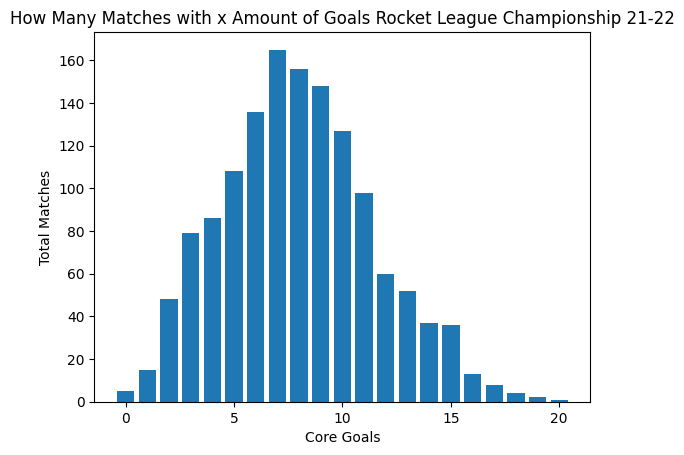

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of occurrences of each value in the core_goals column
counts = na_df['core_goals'].value_counts()

# Create a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title to the plot
plt.title("How Many Matches with x Amount of Goals Rocket League Championship 21-22")
plt.xlabel("Core Goals")
plt.ylabel("Total Matches")

# Number of Core_Goals in North America
plt.show()

In [ ]:
# Filter the DataFrame to select only the rows where team_region is "NA" and core_goals = 1
na_df_1 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 1)]

#len_df
# Calculate the probability of a game having one goal
one_goal_games_prob = len(na_df_1) / na_df['core_goals'].sum()
one_goal_games_prob



0.0013563613346595533

In [ ]:
#total number of na games with 1 goal
len(na_df_1)

15

In [ ]:
#total goals
na_df['core_goals'].sum()

11059.0

In [ ]:
# Calculate the probability of a game having two goal
one_goal_games_prob = len(na_df_1) / na_df['core_goals'].sum()
one_goal_games_prob

0.0013563613346595533

In [ ]:
#goal probability 1-10
na_df_0 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 0)]
zero_goal_games_prob = len(na_df_0) / na_df['core_goals'].sum()
na_df_1 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 1)]
one_goal_games_prob = len(na_df_1) / na_df['core_goals'].sum()
na_df_2 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 2)]
two_goal_games_prob = len(na_df_2) / na_df['core_goals'].sum()
na_df_3 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 3)]
three_goal_games_prob = len(na_df_3) / na_df['core_goals'].sum()
na_df_4 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 4)]
four_goal_games_prob = len(na_df_4) / na_df['core_goals'].sum()
na_df_5 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 5)]
five_goal_games_prob = len(na_df_5) / na_df['core_goals'].sum()
na_df_6 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 6)]
six_goal_games_prob = len(na_df_6) / na_df['core_goals'].sum()
na_df_7 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 7)]
seven_goal_games_prob = len(na_df_7) / na_df['core_goals'].sum()
na_df_8 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 8)]
eight_goal_games_prob = len(na_df_8) / na_df['core_goals'].sum()
na_df_9 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 9)]
nine_goal_games_prob = len(na_df_9) / na_df['core_goals'].sum()
na_df_10 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 10)]
ten_goal_games_prob = len(na_df_10) / na_df['core_goals'].sum()













In [ ]:
one_ten = ten_goal_games_prob + nine_goal_games_prob + eight_goal_games_prob + seven_goal_games_prob + six_goal_games_prob + five_goal_games_prob + four_goal_games_prob + three_goal_games_prob + two_goal_games_prob + one_goal_games_prob + zero_goal_games_prob


In [ ]:
#goal probability 1-10
na_df_0 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 0)]
zero_goal_games_prob = len(na_df_0) / na_df['core_goals'].sum()
na_df_1 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 1)]
one_goal_games_prob = len(na_df_1) / na_df['core_goals'].sum()
na_df_2 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 2)]
two_goal_games_prob = len(na_df_2) / na_df['core_goals'].sum()
na_df_3 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 3)]
three_goal_games_prob = len(na_df_3) / na_df['core_goals'].sum()
na_df_4 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 4)]
four_goal_games_prob = len(na_df_4) / na_df['core_goals'].sum()
na_df_5 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 5)]
five_goal_games_prob = len(na_df_5) / na_df['core_goals'].sum()
na_df_6 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 6)]
six_goal_games_prob = len(na_df_6) / na_df['core_goals'].sum()
na_df_7 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 7)]
seven_goal_games_prob = len(na_df_7) / na_df['core_goals'].sum()
na_df_8 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 8)]
eight_goal_games_prob = len(na_df_8) / na_df['core_goals'].sum()
na_df_9 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 9)]
nine_goal_games_prob = len(na_df_9) / na_df['core_goals'].sum()
na_df_10 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 10)]
ten_goal_games_prob = len(na_df_10) / na_df['core_goals'].sum()













In [ ]:
#goal probability 11-20
na_df_11 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 11)]
eleven_goal_games_prob = len(na_df_11) / na_df['core_goals'].sum()
na_df_12 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 12)]
twelve_goal_games_prob = len(na_df_12) / na_df['core_goals'].sum()
na_df_13 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 13)]
threeteen_goal_games_prob = len(na_df_13) / na_df['core_goals'].sum()
na_df_14 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 14)]
fourteen_goal_games_prob = len(na_df_14) / na_df['core_goals'].sum()
na_df_15 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 15)]
fiftheteen_goal_games_prob = len(na_df_15) / na_df['core_goals'].sum()
na_df_16 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 16)]
sixteen_goal_games_prob = len(na_df_16) / na_df['core_goals'].sum()
na_df_17 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 17)]
seventeen_goal_games_prob = len(na_df_17) / na_df['core_goals'].sum()
na_df_18 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 18)]
eighteen_goal_games_prob = len(na_df_18) / na_df['core_goals'].sum()
na_df_19 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 19)]
nineteen_goal_games_prob = len(na_df_19) / na_df['core_goals'].sum()
na_df_20 = na_df.loc[(na_df['team_region'] == 'North America') & (na_df['core_goals'] == 20)]
twenty_goal_games_prob = len(na_df_20) / na_df['core_goals'].sum()

In [ ]:
eleven_twenty =eleven_goal_games_prob + twelve_goal_games_prob + threeteen_goal_games_prob + fourteen_goal_games_prob + fiftheteen_goal_games_prob + sixteen_goal_games_prob + seventeen_goal_games_prob + eighteen_goal_games_prob + nineteen_goal_games_prob + twenty_goal_games_prob


In [ ]:
one_ten + eleven_twenty

0.12514693914458813